In [ ]:
Data Science Regression Project: Predicting 
Home price in USA

In [4]:
# Import the Libraries
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
# Read the data
supply_data = pd.read_csv("D:/Data science PDF/USA price data/supply_data1.csv")
demand_data = pd.read_csv("D:/Data science PDF/USA price data/demand_data.csv")

In [6]:
supply_data.head()

Period  Permit_Number  construction  Homes_Sold  Housing_Starts
0  1/1/2000           1727        353065         873            1636
1  1/2/2000           1692        351933         856            1737
2  1/3/2000           1651        353452         900            1604
3  1/4/2000           1597        356188         841            1626
4  1/5/2000           1543        349907         857            1575

In [7]:
demand_data.head()

DATE  UNEM_RATE  MORTGAGE      GDPC1  FORECLOSURES     HPI
0  2000-01-01       4.03      8.26  12935.252          1.95  101.34
1  2000-04-01       3.93      8.32  13170.749          1.97  103.67
2  2000-07-01       4.00      8.02  13183.890          2.09  105.79
3  2000-10-01       3.90      7.62  13262.250          2.23  108.27
4  2001-01-01       4.23      7.01  13219.251          2.34  110.48

# About the data

In [8]:
supply_data.shape

(250, 5)

In [9]:
demand_data.shape

(84, 6)

# Explore the data

In [10]:
supply_data.describe().T

count        mean            std       min        25%  \
Permit_Number   250.0    1317.200     470.104252     513.0     998.50   
construction    250.0  428859.360  122721.914363  236512.0  340081.75   
Homes_Sold      250.0     697.272     300.035978     270.0     436.50   
Housing_Starts  250.0    1269.060     460.534507     478.0     926.25   

                     50%        75%       max  
Permit_Number     1302.0    1658.25    2263.0  
construction    415920.0  537308.75  678562.0  
Homes_Sold         624.5     940.50    1389.0  
Housing_Starts    1218.0    1625.75    2273.0

In [11]:
demand_data.describe().T

count          mean          std        min          25%  \
UNEM_RATE      84.0      5.986667     1.976243      3.600      4.55250   
MORTGAGE       84.0      5.092381     1.324841      2.760      3.94250   
GDPC1          84.0  15968.048810  1762.701831  12935.252  14821.74175   
FORECLOSURES   84.0      4.745119     3.290622      1.410      2.09750   
HPI            84.0    161.669405    30.778158    101.340    140.49500   

                     50%          75%       max  
UNEM_RATE         5.4300      7.00500     13.07  
MORTGAGE          4.8850      6.13500      8.32  
GDPC1         15768.5285  17394.92625  19202.31  
FORECLOSURES      3.1600      7.51750     11.54  
HPI             162.2400    182.94500    232.55

In [12]:
# convert date(object format) to date_time64 format for analysis 

In [13]:
supply_data['Period']=pd.to_datetime(supply_data['Period'])
demand_data['DATE']=pd.to_datetime(demand_data['DATE'])

In [14]:
fig = px.histogram(supply_data, 
                    x = supply_data.groupby('Period')['Permit_Number'].nunique().index,
                    y = supply_data.groupby('Period')['Permit_Number'].sum(), 
                   title = 'The Number of Permits allotted yearly', 
                   labels = {'x' :"Period", 'y' :"Permit_Number"}).update_xaxes(categoryorder="total descending")
fig.show();

In [15]:
fig = px.histogram(supply_data, 
                    x = supply_data.groupby('Period')['construction'].nunique().index,
                    y = supply_data.groupby('Period')['construction'].sum(), 
                   title = 'The Amount spent on construction yearly', 
                   labels = {'x' :"Period", 'y' :"construction"}).update_xaxes(categoryorder="total descending")
fig.show();

In [16]:
fig = px.histogram(supply_data, 
                    x = supply_data.groupby('Period')['Homes_Sold'].nunique().index,
                    y = supply_data.groupby('Period')['Homes_Sold'].sum(), 
                   title = 'The Number of Homes_Sold yearly', 
                   labels = {'x' :"Period", 'y' :"Homes_Sold"}).update_xaxes(categoryorder="total descending")
fig.show();

In [17]:
fig = px.histogram(supply_data, 
                    x = supply_data.groupby('Period')['Housing_Starts'].nunique().index,
                    y = supply_data.groupby('Period')['Housing_Starts'].sum(), 
                   title = 'The Number of Housing_Starts yearly', 
                   labels = {'x' :"Period", 'y' :"Housing_Starts"}).update_xaxes(categoryorder="total descending")
fig.show();

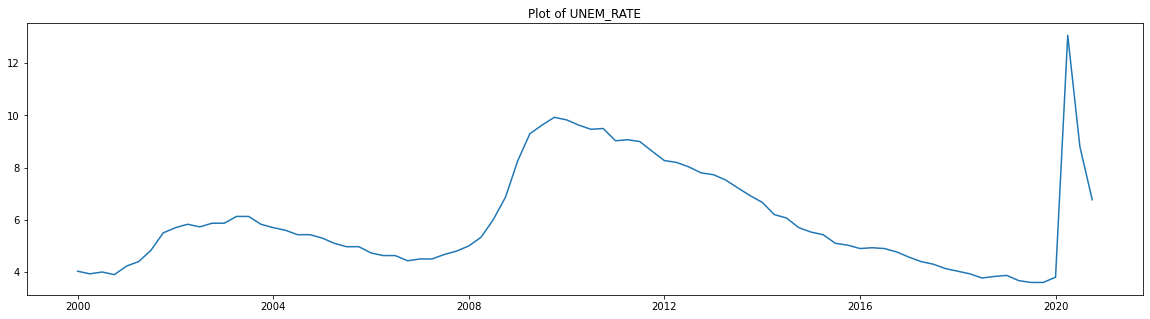

In [18]:
plt.figure(figsize=(20,5))
plt.plot(demand_data['DATE'],demand_data['UNEM_RATE'])
plt.title('Plot of UNEM_RATE')
plt.show()

In [19]:
demand_data.groupby(['DATE','UNEM_RATE'])['HPI'].sum().reset_index().sort_values('UNEM_RATE', ascending=False).head(10)

DATE  UNEM_RATE     HPI
81 2020-04-01      13.07  217.89
39 2009-10-01       9.93  147.97
40 2010-01-01       9.83  146.29
38 2009-07-01       9.63  148.24
41 2010-04-01       9.63  146.17
43 2010-10-01       9.50  142.25
42 2010-07-01       9.47  143.97
37 2009-04-01       9.30  147.91
45 2011-04-01       9.07  139.93
44 2011-01-01       9.03  140.62

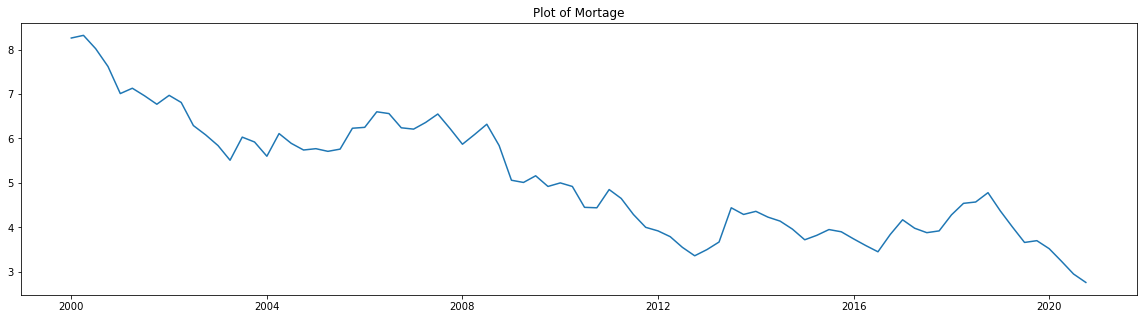

In [20]:
plt.figure(figsize=(20,5))
plt.plot(demand_data['DATE'],demand_data['MORTGAGE'])
plt.title('Plot of Mortage')
plt.show()

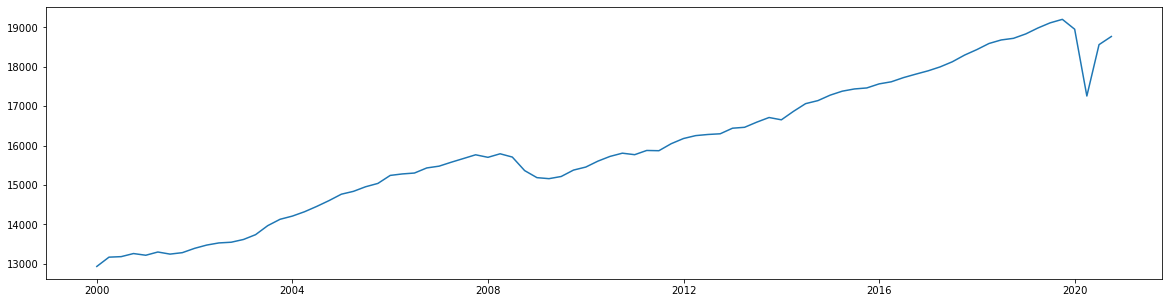

In [21]:
plt.figure(figsize=(20,5))
plt.plot(demand_data['DATE'],demand_data['GDPC1'])
plt.show()

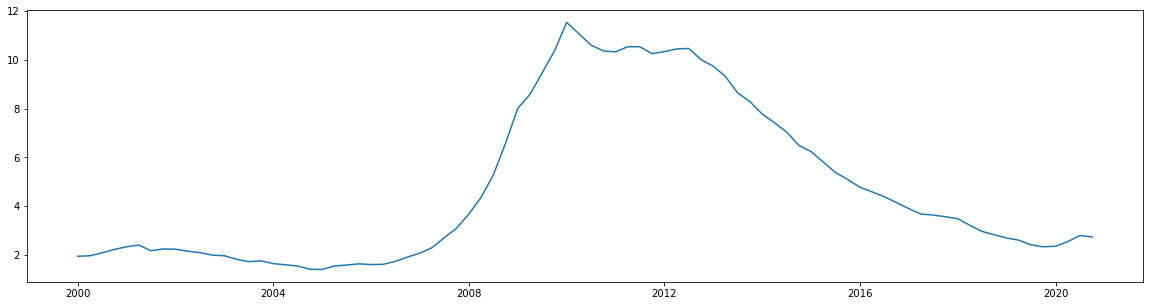

In [22]:
plt.figure(figsize=(20,5))
plt.plot(demand_data['DATE'],demand_data['FORECLOSURES'])
plt.show()

In [23]:
(demand_data[demand_data['FORECLOSURES']>10])

DATE  UNEM_RATE  MORTGAGE      GDPC1  FORECLOSURES     HPI
39 2009-10-01       9.93      4.92  15379.155         10.36  147.97
40 2010-01-01       9.83      5.00  15456.059         11.54  146.29
41 2010-04-01       9.63      4.92  15605.628         11.08  146.17
42 2010-07-01       9.47      4.45  15726.282         10.61  143.97
43 2010-10-01       9.50      4.44  15807.995         10.37  142.25
44 2011-01-01       9.03      4.85  15769.911         10.33  140.62
45 2011-04-01       9.07      4.65  15876.839         10.54  139.93
46 2011-07-01       9.00      4.29  15870.684         10.54  139.24
47 2011-10-01       8.63      4.00  16048.702         10.26  137.26
48 2012-01-01       8.27      3.92  16179.968         10.34  137.02
49 2012-04-01       8.20      3.79  16253.726         10.45  140.12
50 2012-07-01       8.03      3.55  16282.151         10.47  142.29
51 2012-10-01       7.80      3.36  16300.035         10.01  144.56

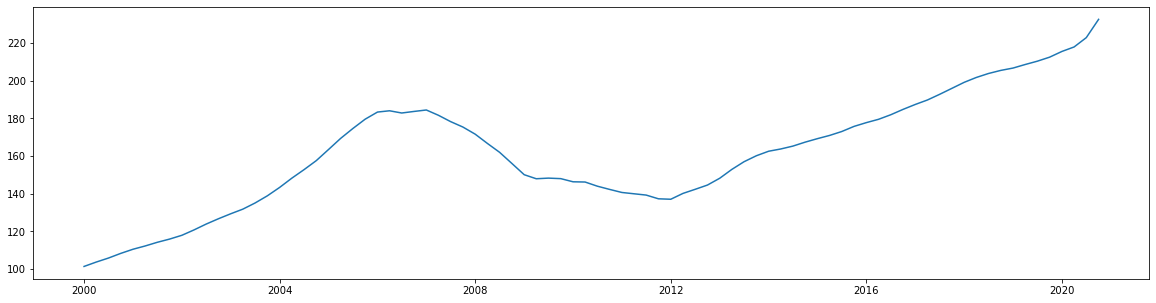

In [24]:
plt.figure(figsize=(20,5))
plt.plot(demand_data['DATE'],demand_data['HPI'])
plt.show()

In [25]:
# Top five HPI years
demand_data.groupby(['DATE'])['HPI'].sum().reset_index().sort_values('HPI', ascending=False).head(20)

DATE     HPI
83 2020-10-01  232.55
82 2020-07-01  222.84
81 2020-04-01  217.89
80 2020-01-01  215.51
79 2019-10-01  212.47
78 2019-07-01  210.33
77 2019-04-01  208.56
76 2019-01-01  206.69
75 2018-10-01  205.44
74 2018-07-01  203.79
73 2018-04-01  201.68
72 2018-01-01  199.11
71 2017-10-01  195.91
70 2017-07-01  192.72
69 2017-04-01  189.72
68 2017-01-01  187.37
67 2016-10-01  184.74
28 2007-01-01  184.42
25 2006-04-01  184.00
27 2006-10-01  183.65

In [26]:
(demand_data[demand_data['DATE']=='2010-04-01'])

DATE  UNEM_RATE  MORTGAGE      GDPC1  FORECLOSURES     HPI
41 2010-04-01       9.63      4.92  15605.628         11.08  146.17

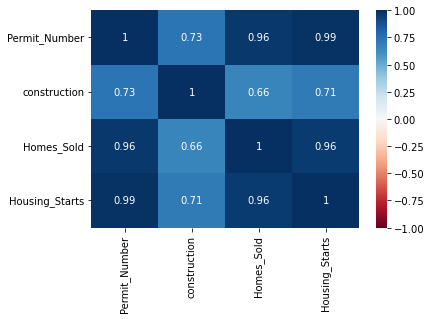

In [27]:
sns.heatmap(supply_data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

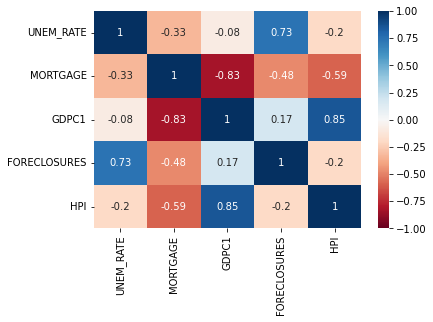

In [28]:
sns.heatmap(demand_data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

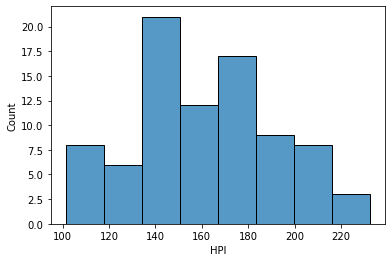

In [29]:
sns.histplot(demand_data['HPI'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



skewness:  0.08099273280549579
kurtosis:  -0.5738630509176961


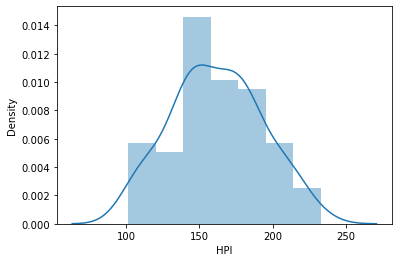

In [30]:
sns.distplot(demand_data['HPI'])
print('skewness: ',demand_data['HPI'].skew())
print('kurtosis: ',demand_data['HPI'].kurt())

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



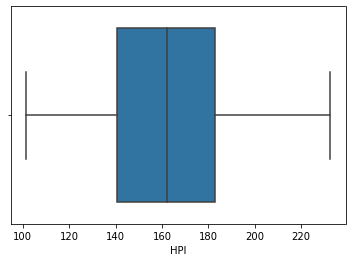

In [31]:
sns.boxplot(demand_data['HPI'])
plt.show()

In [32]:
# Top Mortgage rate year
demand_data.groupby(['DATE','UNEM_RATE','MORTGAGE'])['HPI'].sum().reset_index().sort_values('MORTGAGE', ascending=False)

DATE  UNEM_RATE  MORTGAGE     HPI
1  2000-04-01       3.93      8.32  103.67
0  2000-01-01       4.03      8.26  101.34
2  2000-07-01       4.00      8.02  105.79
3  2000-10-01       3.90      7.62  108.27
5  2001-04-01       4.40      7.13  112.20
..        ...        ...       ...     ...
66 2016-07-01       4.90      3.45  181.88
51 2012-10-01       7.80      3.36  144.56
81 2020-04-01      13.07      3.24  217.89
82 2020-07-01       8.80      2.95  222.84
83 2020-10-01       6.77      2.76  232.55

[84 rows x 4 columns]

In [33]:
# Top GDP years 
demand_data.groupby(['DATE','UNEM_RATE','GDPC1'])['HPI'].sum().reset_index().sort_values('GDPC1', ascending=False).head()

DATE  UNEM_RATE      GDPC1     HPI
79 2019-10-01       3.60  19202.310  212.47
78 2019-07-01       3.60  19112.653  210.33
77 2019-04-01       3.67  18982.528  208.56
80 2020-01-01       3.80  18951.992  215.51
76 2019-01-01       3.87  18833.195  206.69

# Feature Engineering

In [34]:
demand_data.isnull().sum()

DATE            0
UNEM_RATE       0
MORTGAGE        0
GDPC1           0
FORECLOSURES    0
HPI             0
dtype: int64

In [35]:
supply_data.isnull().sum()

Period            0
Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
dtype: int64

# Data Pre-processing

In [36]:
supply_data.isnull().sum()

Period            0
Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
dtype: int64

In [37]:
demand_data.isnull().sum()

DATE            0
UNEM_RATE       0
MORTGAGE        0
GDPC1           0
FORECLOSURES    0
HPI             0
dtype: int64

In [38]:
demand_data.drop(['DATE'],axis=1,inplace=True)

In [39]:
demand_data = pd.get_dummies(demand_data)

In [40]:
demand_data

UNEM_RATE  MORTGAGE      GDPC1  FORECLOSURES     HPI
0        4.03      8.26  12935.252          1.95  101.34
1        3.93      8.32  13170.749          1.97  103.67
2        4.00      8.02  13183.890          2.09  105.79
3        3.90      7.62  13262.250          2.23  108.27
4        4.23      7.01  13219.251          2.34  110.48
..        ...       ...        ...           ...     ...
79       3.60      3.70  19202.310          2.34  212.47
80       3.80      3.52  18951.992          2.36  215.51
81      13.07      3.24  17258.205          2.55  217.89
82       8.80      2.95  18560.774          2.80  222.84
83       6.77      2.76  18767.778          2.74  232.55

[84 rows x 5 columns]

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc =StandardScaler()

In [43]:
data_s=sc.fit_transform(demand_data)

In [44]:
data_s

array([[-0.99604051,  2.40530279, -1.73087241, -0.8545214 , -1.97190965],
       [-1.04694547,  2.45086324, -1.59646998, -0.84840701, -1.89575194],
       [-1.011312  ,  2.22306097, -1.58897017, -0.81172072, -1.82645823],
       [-1.06221696,  1.91932459, -1.54424869, -0.76892004, -1.74539766],
       [-0.89423058,  1.45612663, -1.56878901, -0.73529093, -1.67316223],
       [-0.80769213,  1.54724754, -1.5219085 , -0.71389059, -1.6169428 ],
       [-0.58880078,  1.41815958, -1.55230039, -0.78420599, -1.5528788 ],
       [-0.2477375 ,  1.27388481, -1.53133277, -0.76280565, -1.49698623],
       [-0.14592757,  1.42575299, -1.46853721, -0.76586285, -1.43096109],
       [-0.07975111,  1.30425844, -1.42148378, -0.79032038, -1.33846052],
       [-0.13065608,  0.90940116, -1.39044527, -0.80866353, -1.23680795],
       [-0.05938913,  0.74993956, -1.38035497, -0.83923544, -1.14398053],
       [-0.05938913,  0.56769774, -1.34039728, -0.84840701, -1.05736338],
       [ 0.07296379,  0.31711524, -1.2

In [45]:
data_s = pd.DataFrame(data_s,columns=demand_data.columns)

In [46]:
data_s.head(10)

UNEM_RATE  MORTGAGE     GDPC1  FORECLOSURES       HPI
0  -0.996041  2.405303 -1.730872     -0.854521 -1.971910
1  -1.046945  2.450863 -1.596470     -0.848407 -1.895752
2  -1.011312  2.223061 -1.588970     -0.811721 -1.826458
3  -1.062217  1.919325 -1.544249     -0.768920 -1.745398
4  -0.894231  1.456127 -1.568789     -0.735291 -1.673162
5  -0.807692  1.547248 -1.521908     -0.713891 -1.616943
6  -0.588801  1.418160 -1.552300     -0.784206 -1.552879
7  -0.247738  1.273885 -1.531333     -0.762806 -1.496986
8  -0.145928  1.425753 -1.468537     -0.765863 -1.430961
9  -0.079751  1.304258 -1.421484     -0.790320 -1.338461

In [47]:
demand_data.duplicated().value_counts()

False    84
dtype: int64

# Train Test Split

In [48]:
y = demand_data['HPI']
x =demand_data.drop(columns=['HPI'])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85)

In [51]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(71, 4) (13, 4) (71,) (13,)


# Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [53]:
model = LinearRegression()

In [54]:
model.fit(x_train,y_train)

LinearRegression()

In [55]:
model.coef_

array([ 8.82986135,  8.05554639,  0.02293984, -6.41909101])

In [56]:
model.intercept_

-267.14941695042046

In [57]:
y_pred = model.predict(x_test)

In [58]:
resid = y_test-y_pred

In [59]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred,'Residual':resid}).head(20)

Actual Y  Predicted Y   Residual
40    146.29   140.409031   5.880969
34    161.96   163.287001  -1.327001
80    215.51   214.366150   1.143850
44    140.62   147.103624  -6.483624
47    137.26   143.569222  -6.309222
12    129.32   131.508260  -2.188260
64    177.71   178.510313  -0.800313
15    138.83   144.891454  -6.061454
81    217.89   253.888585 -35.998585
48    137.02   142.243721  -5.223721
76    206.69   216.923780 -10.233780
39    147.97   146.457935   1.512065
3     108.27   118.589599 -10.319599

In [60]:
SSE =sum(resid**2)# Sum(yi-y^)**2 LOSS FUNCTION
SSE

1698.3650980051125

In [61]:
SAE = sum(resid.abs()) # sum of absolute errors
SAE

93.4824423726162

# Validation

In [62]:
def Validation(test,pred,data):
    r2 = r2_score(test,pred)
    n= data.shape[0]
    k=data.shape[1]
    adj_r2= 1-((n-1)/(n-k-1)*(1-r2))
    
    print('R square:',r2)
    print('Adj R square:',adj_r2)
    print('MSE:',mean_squared_error(test,pred))
    print('RMSE:',(mean_squared_error(test,pred))**0.5)
    print('MAPE',mean_absolute_percentage_error(test,pred))


In [63]:
Validation(y_test,y_pred,demand_data)

R square: 0.8847190763591348
Adj R square: 0.8773292735616435
MSE: 130.64346907731635
RMSE: 11.429937404785573
MAPE 0.04378797485875198


# StatsModel

In [64]:
import statsmodels.api as sm

In [65]:
model_stat = sm.OLS(y,x)
result = model_stat.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    HPI   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4077.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                    1.43e-91
Time:                        23:16:38   Log-Likelihood:                         -324.32
No. Observations:                  84   AIC:                                      656.6
Df Residuals:                      80   BIC:                                      666.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

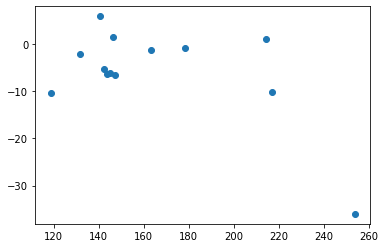

In [66]:
plt.scatter(x=y_pred,y=resid)
plt.show()

# Test for Overfit

In [67]:
y_pred_train = model.predict(x_train)

In [68]:
Validation(y_train,y_pred_train,demand_data)

R square: 0.9026453964163081
Adj R square: 0.8964047166994048
MSE: 87.44465954616577
RMSE: 9.351184927385715
MAPE 0.04644184613632952


In [69]:
Validation(y_test,y_pred,demand_data)

R square: 0.8847190763591348
Adj R square: 0.8773292735616435
MSE: 130.64346907731635
RMSE: 11.429937404785573
MAPE 0.04378797485875198


# Regularization

# Ridge Regression

In [70]:
from sklearn.linear_model import Ridge,Lasso

In [71]:
model_ridge=Ridge(alpha=10)

In [72]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [73]:
y_pred_ridge = model_ridge.predict(x_test)

In [74]:
Validation(y_test,y_pred_ridge,demand_data)

R square: 0.9414190547638897
Adj R square: 0.9376638659667031
MSE: 66.38754848387423
RMSE: 8.147855453054762
MAPE 0.044681827616290616


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param = {'alpha':[0.001,0.01,0.1,1,10,100,500]}

In [77]:
gscv = GridSearchCV(estimator=Ridge(),
                   param_grid=param,
                   scoring='r2',
                   cv=3,
                   verbose=3)

In [78]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END .......................alpha=0.001;, score=0.869 total time=   0.0s
[CV 2/3] END .......................alpha=0.001;, score=0.862 total time=   0.0s
[CV 3/3] END .......................alpha=0.001;, score=0.908 total time=   0.0s
[CV 1/3] END ........................alpha=0.01;, score=0.869 total time=   0.0s
[CV 2/3] END ........................alpha=0.01;, score=0.862 total time=   0.0s
[CV 3/3] END ........................alpha=0.01;, score=0.908 total time=   0.0s
[CV 1/3] END .........................alpha=0.1;, score=0.869 total time=   0.0s
[CV 2/3] END .........................alpha=0.1;, score=0.862 total time=   0.0s
[CV 3/3] END .........................alpha=0.1;, score=0.909 total time=   0.0s
[CV 1/3] END ...........................alpha=1;, score=0.869 total time=   0.0s
[CV 2/3] END ...........................alpha=1;, score=0.857 total time=   0.0s
[CV 3/3] END ...........................alpha=1;,

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='r2', verbose=3)

In [79]:
gscv.best_params_

{'alpha': 1}

In [80]:
gscv.best_score_

0.8816541820092221

# Lasso

In [81]:
model_lasso = Lasso(alpha=10)

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
from scipy.stats import loguniform

In [84]:
params = {'alpha':loguniform(0.001,100)}

In [85]:
rscv = RandomizedSearchCV(estimator=Lasso(),
                         param_distributions=params,
                         scoring='r2',
                         verbose=3,
                         n_iter=20)

In [86]:
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........alpha=0.9521176178638217;, score=0.859 total time=   0.0s
[CV 2/5] END ..........alpha=0.9521176178638217;, score=0.843 total time=   0.0s
[CV 3/5] END ..........alpha=0.9521176178638217;, score=0.719 total time=   0.0s
[CV 4/5] END ..........alpha=0.9521176178638217;, score=0.931 total time=   0.0s
[CV 5/5] END ..........alpha=0.9521176178638217;, score=0.894 total time=   0.0s
[CV 1/5] END ........alpha=0.004147446825085332;, score=0.874 total time=   0.0s
[CV 2/5] END ........alpha=0.004147446825085332;, score=0.859 total time=   0.0s
[CV 3/5] END ........alpha=0.004147446825085332;, score=0.757 total time=   0.0s
[CV 4/5] END ........alpha=0.004147446825085332;, score=0.951 total time=   0.0s
[CV 5/5] END ........alpha=0.004147446825085332;, score=0.824 total time=   0.0s
[CV 1/5] END ..........alpha=1.3707786463911147;, score=0.847 total time=   0.0s
[CV 2/5] END ..........alpha=1.3707786463911147

RandomizedSearchCV(estimator=Lasso(), n_iter=20,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000173AADB5E20>},
                   scoring='r2', verbose=3)

In [87]:
rscv.best_score_

0.8566565979747501

In [88]:
rscv.best_params_

{'alpha': 0.46451957692575346}

In [89]:
model_lasso = Lasso(**rscv.best_params_)

In [90]:
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.46451957692575346)

In [91]:
y_pred_lasso = model_lasso.predict(x_test)

In [92]:
Validation(y_test,y_pred_lasso,demand_data)

R square: 0.9233306179217943
Adj R square: 0.9184159139424222
MSE: 86.88648329983009
RMSE: 9.321291932979575
MAPE 0.04444670943022593


In [93]:
LinearRegression()

LinearRegression()

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
model_dt = DecisionTreeRegressor()

In [96]:
params = {'criterion':["squared_error","absolute_error"],
         'max_depth':[4,5,6,7,8,9]}

In [97]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=params,
                   scoring='r2',
                   verbose=3)

In [98]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=4;, score=0.964 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4;, score=0.967 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=4;, score=0.966 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=4;, score=0.905 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5;, score=0.979 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5;, score=0.974 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5;, score=0.928 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5;, score=0.982 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5;, score=0.878 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=6;, score=0.962 total time=   0.0s
[CV 2/5] END criterion=squ

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8, 9]},
             scoring='r2', verbose=3)

In [99]:
gscv.best_score_

0.9688986863693121

In [100]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 8}

In [101]:
model_dt = DecisionTreeRegressor(**gscv.best_params_)

In [102]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [103]:
y_pred_dt = model_dt.predict(x_test)

In [104]:
Validation(y_test,y_pred_dt,demand_data)

R square: 0.6347099788867012
Adj R square: 0.611293951892259
MSE: 413.9692333333332
RMSE: 20.34623388574242
MAPE 0.04932697609772184


In [105]:
from sklearn import tree

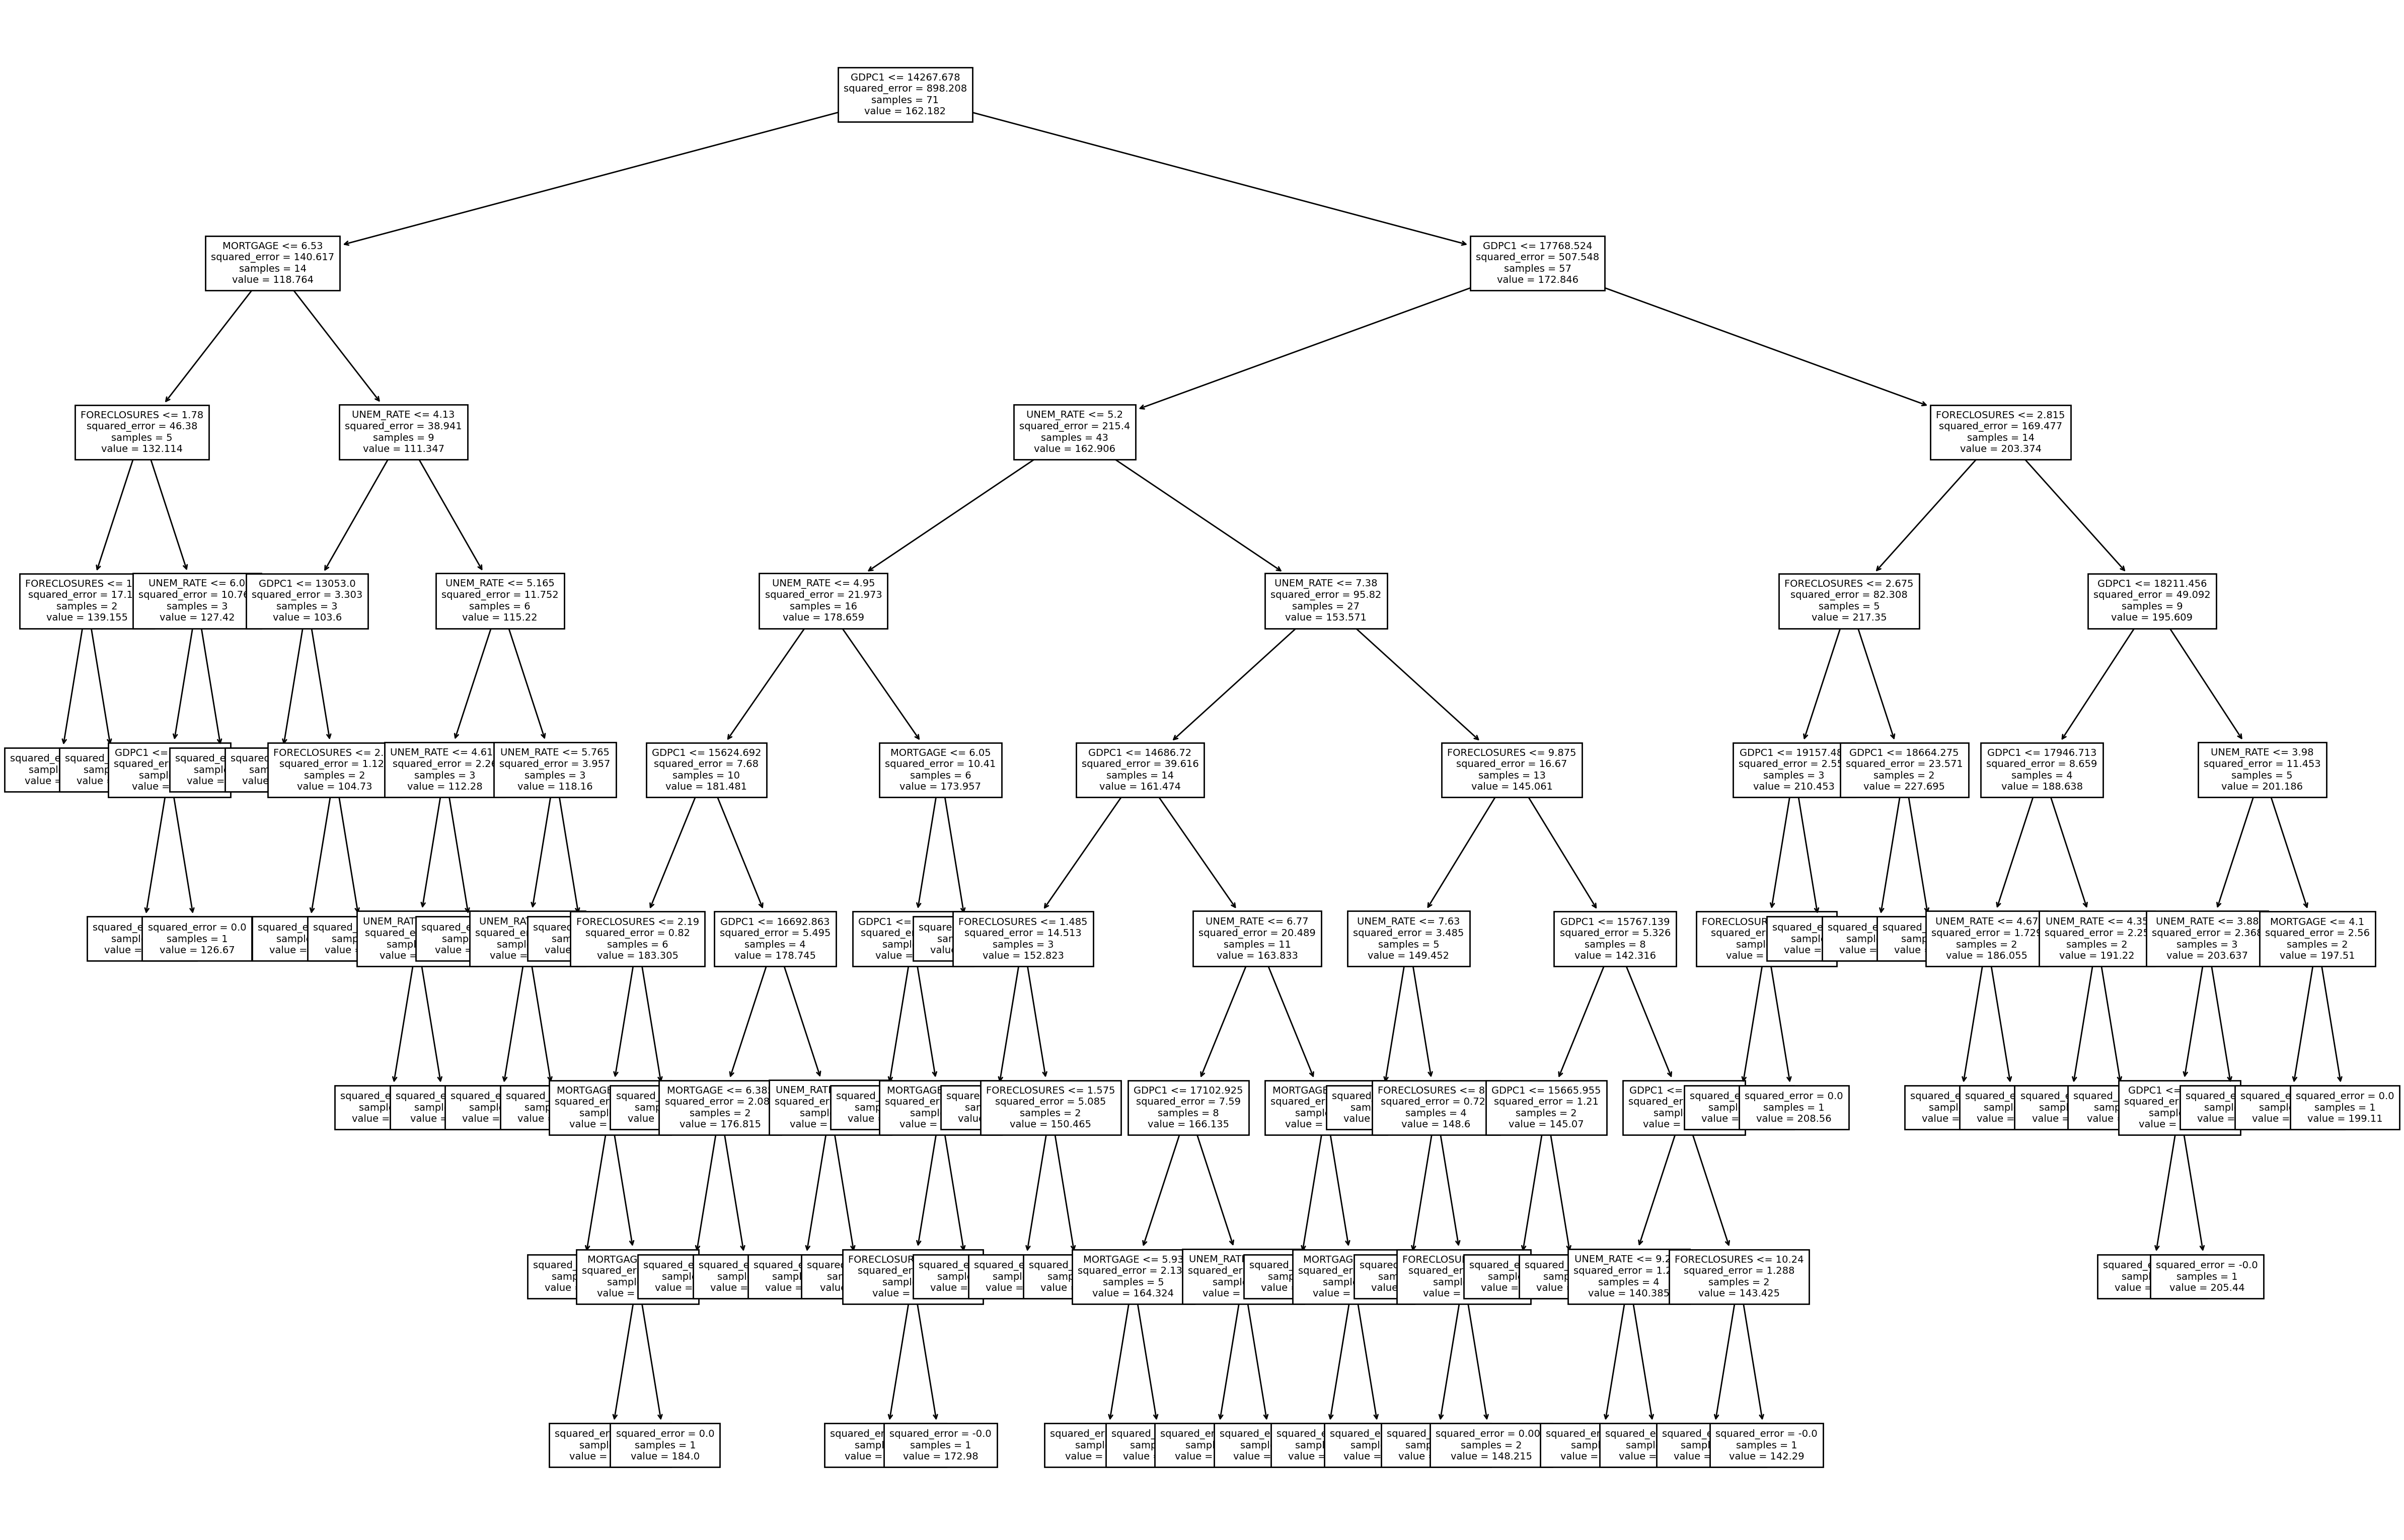

In [106]:
plt.figure(figsize=(30,20),dpi=200)
tree.plot_tree(model_dt,feature_names=x_train.columns,fontsize=7)
plt.show()

# ENsamples Model

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model_rf = RandomForestRegressor()

In [109]:
params = {'criterion':["squared_error","absolute_error"],
         'max_depth':[4,5,6,7,8,9]}

In [110]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=params,
                   scoring='r2',
                   verbose=3)

In [111]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=4;, score=0.964 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4;, score=0.967 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4;, score=0.925 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=4;, score=0.966 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=4;, score=0.949 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5;, score=0.974 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5;, score=0.961 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5;, score=0.983 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5;, score=0.954 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=6;, score=0.957 total time=   0.0s
[CV 2/5] END criterion=squ

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=8),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8, 9]},
             scoring='r2', verbose=3)

In [112]:
gscv.best_score_

0.9691175933801979

In [113]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 5}

In [114]:
model_rf = RandomForestRegressor(**gscv.best_params_)

In [115]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [116]:
y_pred_rf = model_rf.predict(x_test)

In [117]:
Validation(y_test,y_pred_rf, demand_data)

R square: 0.7380198514483481
Adj R square: 0.7212262521822166
MSE: 296.89209936244754
RMSE: 17.230557140221773
MAPE 0.03788237320775519


In [118]:
model_rf.score(x_train,y_train)

0.994546891090214